# Regime filters

A regime filter is a classification to indicate the market condition we are in. They could provide some useful pointers to improve trading results. Though we cannot predict the market movements with certainty, we can atleast get an edge.

We should keep these filters simple so that it is easy to understand and do not overfit too much to available data. Boolean filters are a good choice since they only have a true or false value and not prone to too much overfitting, though they may only have a slight edge.

## A simple price filter

Let us a simple price filter.

1. Create a moving average of the price for the last 60 days.
2. If the close price is greater than the average price, give it a value of 1.
3. If the close price is less than the average price, give it a value of 0
    
We shift the average price by 1 day so that we do not include today's close price 

<!-- TEASER_END -->

In [109]:
import pandas as pd
import seaborn as sns
sns.set()

In [110]:
# parameters
ma = 60

In [111]:
df = pd.read_csv('/home/pi/data/sp500.csv', parse_dates=['Date']).rename(
columns = lambda x:x.lower()).sort_values(by='date').set_index('date')
df['ret'] = df.close.pct_change()
df.tail()

,open,high,low,close,volume,adj close,ret
date,,,,,,,
2021-11-24,4675.779785,4702.870117,4659.890137,4701.459961,2464040000,4701.459961,0.002294
2021-11-26,4664.629883,4664.629883,4585.430176,4594.620117,2676740000,4594.620117,-0.022725
2021-11-29,4628.750000,4672.950195,4625.259766,4655.270020,3471380000,4655.270020,0.013200
2021-11-30,4640.250000,4646.020020,4560.000000,4567.000000,4950190000,4567.000000,-0.018961
2021-12-01,4602.819824,4652.939941,4510.270020,4513.040039,4078260000,4513.040039,-0.011815


In [112]:
df['ma_price'] = df.close.rolling(ma).mean().shift(1)
df['is_price'] = df.eval('close > ma_price')+0

In [113]:
df.groupby(['is_price']).ret.describe()

,count,mean,std,min,25%,50%,75%,max
is_price,,,,,,,,
0,1889.0,-0.001884,0.01769,-0.119841,-0.011085,-0.001477,0.006545,0.115800
1,3626.0,0.001408,0.00814,-0.058944,-0.002722,0.001164,0.005583,0.070758


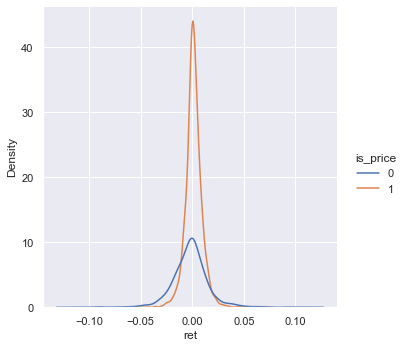

In [114]:
sns.displot(data=df, x='ret', hue='is_price', kind='kde')

Looks there seem to be an edge. If the price is less than the moving average, the average returns are negative while if it is greater than the moving average, it is positive. So, a good time to take a long position would be when the price is more than the moving average.

<div class="alert alert-info">
    We are only taking the daily returns here. Extending this to multiple days may be more practical as a strategy
</div>
   
TODO
------
 - [ ] Calculate for different moving averages
 - [ ] See if there is some predictive power for intraday
